In [104]:
#Stock Market Analysis 
#Questions
#Monte Carlo method

In [105]:
#Imports

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Reading data from Yahoo
import pandas_datareader as dr
from pandas_datareader import data, wb

from datetime import datetime
from __future__ import division

In [106]:
#Got data from Yahoo Finance historical data
aapl = pd.read_csv('AAPL.csv')
goog = pd.read_csv('GOOG.csv')
msft = pd.read_csv('MSFT.csv')
amzn = pd.read_csv('AMZN.csv')

In [107]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,192.182988,194.229283,190.167211,192.204741,190.601967,3.256396e+07
std,21.068993,21.211365,20.938737,21.013192,20.826901,1.392455e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.805000,175.934998,173.555000,174.794998,173.366134,2.290740e+07
50%,196.419998,198.850006,193.820007,197.000000,195.501465,2.918400e+07
75%,207.574997,209.194999,205.274994,207.610001,206.495002,3.890535e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


In [108]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Date         251 non-null object
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


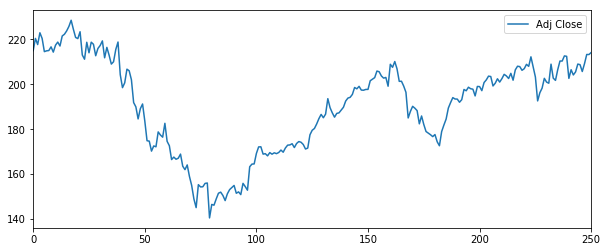

In [109]:
#Plotting closing price 
aapl['Adj Close'].plot(legend = True, figsize = (10,4))

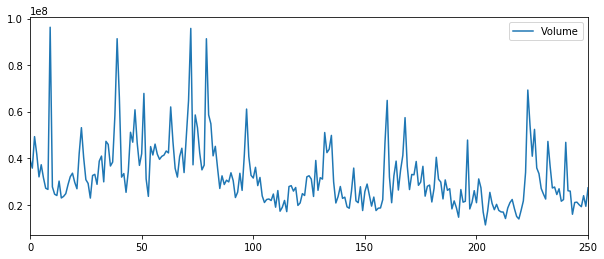

In [110]:
#Plotting volume
aapl['Volume'].plot(legend = True, figsize = (10,4))

In [111]:
#Calculating moving average for the stock
#Using pandas rolling mean calculator

ma_day = [10, 20, 50]

for x in ma_day:
    column_name = "MA for %s days" %(str(x))
    aapl[column_name] = aapl['Adj Close'].rolling(x).mean()

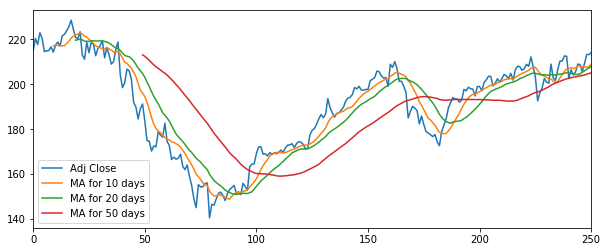

In [112]:
#Plotting all moving averages
#Check this..should be month 
aapl[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(subplots = False, figsize = (10,4))

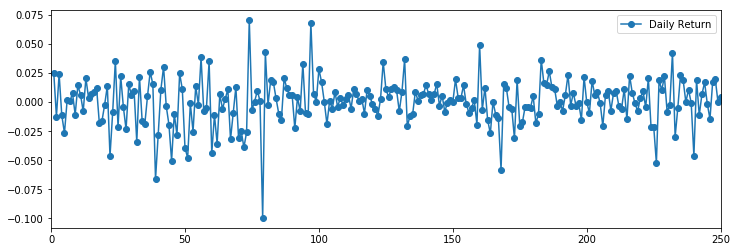

In [113]:
#Daily Return Analysis
#Analyzing risk of the stock by checking daily changes in stock

aapl['Daily Return'] = aapl['Adj Close'].pct_change()
aapl['Daily Return'].plot(figsize=(12,4), legend = True, marker = 'o')

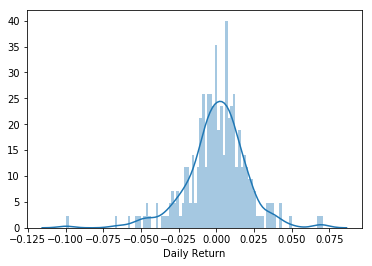

In [114]:
#histogram and kdeplot 
#dropna to clean null values. Cant be read by seaborn

sns.distplot(aapl['Daily Return'].dropna(), bins = 100)
#aapl['Daily Return'].hist()

In [115]:
closing_df = dr.data.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-09-10,214.993759,1939.010010,1164.640015,107.687813
2018-09-11,220.429443,1987.150024,1177.359985,109.519043
2018-09-12,217.691925,1990.000000,1162.819946,109.981766
2018-09-13,222.950317,1989.869995,1175.329956,111.163208
2018-09-14,220.419571,1970.189941,1172.530029,111.616089


In [116]:
#Daily returns for all stocks
tech_ret = closing_df.pct_change()

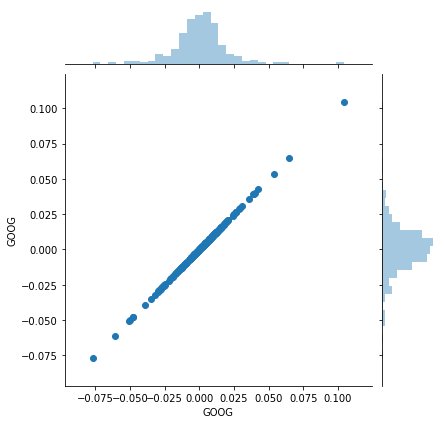

In [118]:
#Can check changes in daily pct return of two stocks and see correlation
#Checking the same stock..it will be postive correlation

sns.jointplot('GOOG','GOOG',tech_ret, kind = 'scatter')

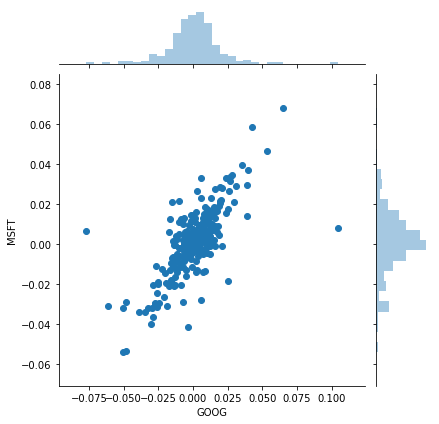

In [121]:
#Checking correlation between google and microsoft
sns.jointplot('GOOG', 'MSFT', tech_ret, kind = 'scatter')

#Check Pearson product value. By shape

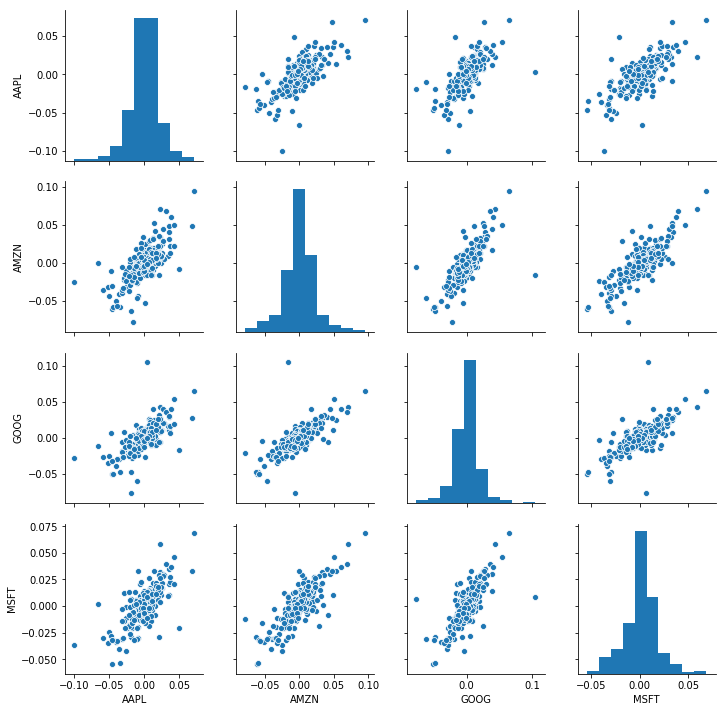

In [123]:
#All plot types
sns.pairplot(tech_ret.dropna())

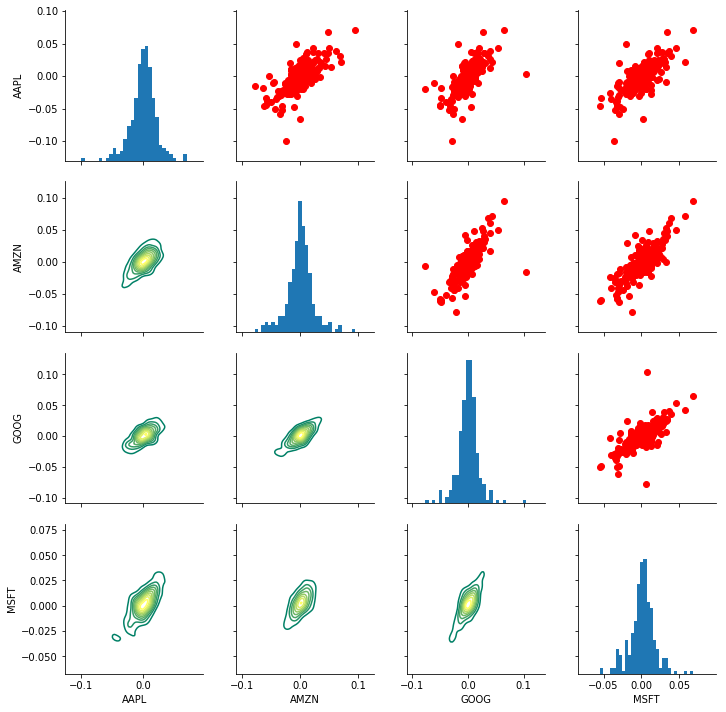

In [124]:
#using PairGrid to select plot type

return_fig = sns.PairGrid(tech_ret.dropna())
return_fig.map_upper(plt.scatter, color = 'red')
return_fig.map_lower(sns.kdeplot, cmap = 'summer')

#Setting diagonal as histograms of daily returns
return_fig.map_diag(plt.hist, bins = 30)

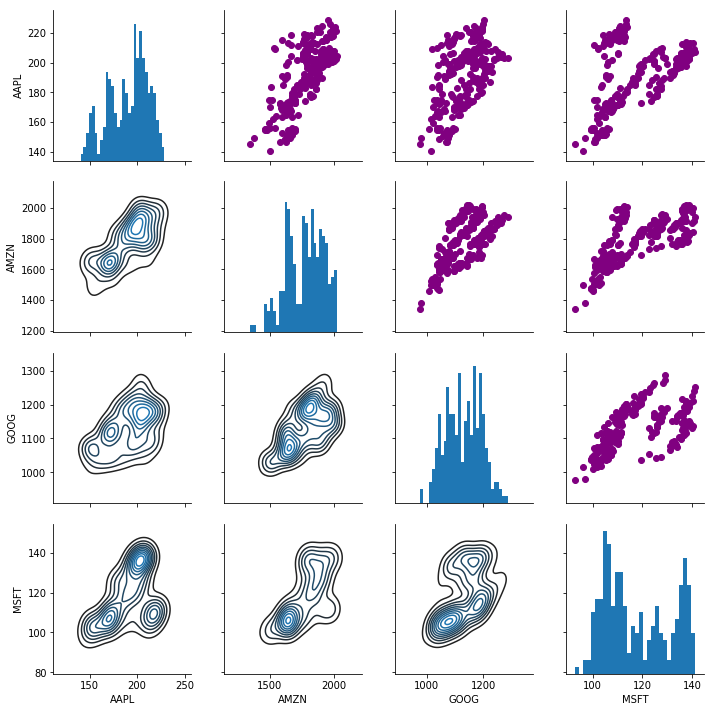

In [126]:
#Correlation between Closing Prices

close_fig = sns.PairGrid(closing_df)
close_fig.map_upper(plt.scatter, color = 'purple')
close_fig.map_lower(sns.kdeplot)
close_fig.map_diag(plt.hist, bins = 30)

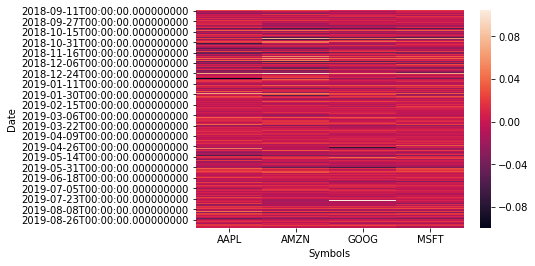

In [132]:
#Correlation plot to get numbers 
sns.heatmap(tech_ret.dropna())

#Make this better. Corrplot is deprecated
#Should see that Amazon & Google have strong correlated daily returns
#Tech companies are postively correlated

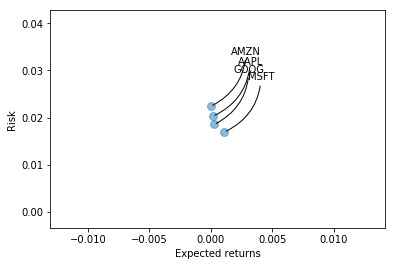

In [133]:
#Risk Analysis
#Comparing expected return with std of daily returns

#Clean -null values
ret = tech_ret.dropna()

area = np.pi*20
plt.scatter(ret.mean(), ret.std(), alpha = 0.5, s = area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(ret.columns, ret.mean(), ret.std()):
    plt.annotate(
    label,
    xy = (x, y), xytext = (50, 50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0.3'))

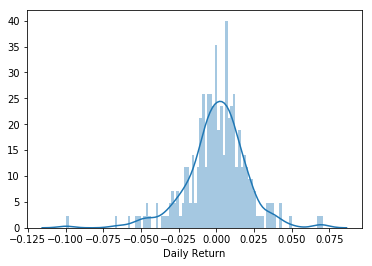

In [134]:
#Value at risk - amount of money expected to lose
#Using Bootstrap method

sns.distplot(aapl['Daily Return'].dropna(), bins = 100)

In [138]:
#0.05 is the empirical quantile of daily returns
ret['AAPL'].quantile(0.05)

-0.033264844875757

In [139]:
#With 95% confidence, worst loss wont be greater than 3.3%

In [140]:
#Value at Risk - Monte Carlo Method
#Example

#Time horizon
days = 365

#Delta
dt = 1/days

#mu/Drift from the expected return
mu = ret.mean()['GOOG']

#sigma
sigma = ret.std()['GOOG']

In [141]:
#Function uses Monte Carlo method
#Takes starting stock price, days of simulation,mu,sigma, and returns simulated price array

def stock_monte_carlo(start_price,days,mu,sigma):
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for Google')

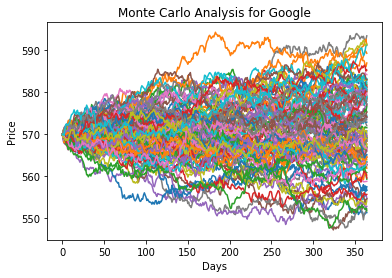

In [144]:
start_price = 569.85

for x in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [151]:
#Histogram

#large number of runs
runs = 10000

#empty matrix to store end price data
sim = np.zeros(runs)

#Threshold suppresses output to display only 0-5 points
np.set_printoptions(threshold = 5)

#Setting sim datapoint as the last stock price in that run
for x in xrange(runs):
    sim[x] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5,1,'Final Price dist for Google after 365 days')

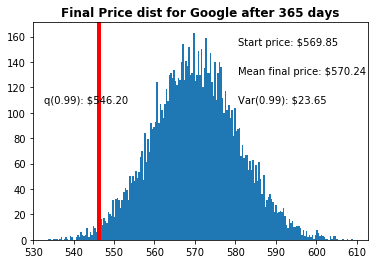

In [152]:
#Plotting histogram and qunatile

#1% empirical quantile i.e, 99% of values should fall here
q = np.percentile(sim, 1)

#Plotting end prices
plt.hist(sim, bins = 200)

#plt.figtext to add addnl info 

#Starting price
plt.figtext(0.6, 0.8, s = 'Start price: $%.2f' %start_price)

#Mean ending price
plt.figtext(0.6,0.7, 'Mean final price: $%.2f' %sim.mean())

#Variance of price (99% confidence interval)
plt.figtext(0.6, 0.6, 'Var(0.99): $%.2f' %(start_price - q))

#Display 1% quantile
plt.figtext(0.15, 0.6, 'q(0.99): $%.2f' %q)

#Plotting line at 1% quantile result
plt.axvline(x = q, linewidth = 4, color = 'red')

#Title
plt.title('Final Price dist for Google after %s days' %days, weight = 'bold')